In [1]:
# Import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from matplotlib import cm
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
# Constants
IMAGE_SIZE = (224, 224)
NUM_AUG = 3
CSV_PATH = './data/original_data/annotations.csv'

In [3]:
def preprocess_data():
    
    """
    This function preprocesses the data for a model. It reads image data from a CSV file,
    performs image augmentation, assigns labels to images based on a unique class mapping,
    and finally transforms labels and images into numpy arrays.
    """
    
    annotations_df = pd.read_csv(CSV_PATH)
    unique_classes = annotations_df['class'].unique()
    class_mapping = {class_name: i for i, class_name in enumerate(unique_classes)}
    images = []
    class_labels = []

    datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range = 0.1, 
        zoom_range = 0.1,
        horizontal_flip=True,
        brightness_range=(0.9, 1.1),
    )

    for index, row in annotations_df.iterrows():
        image_filename = row['filename']
        image_path = os.path.join('./data/original_data', image_filename)
        image = Image.open(image_path)
        image = image.resize(IMAGE_SIZE)
        image_array = np.array(image)
        image_array = image_array.reshape((1,) + image_array.shape)

        generator = datagen.flow(image_array, batch_size=1)

        for _ in range(NUM_AUG):
            augmented_image = next(generator)[0] 
            images.append(augmented_image)
            class_labels.append(class_mapping[row['class']])

    class_labels = to_categorical(class_labels)
    images = np.array(images)
    class_labels = np.array(class_labels)

    return images, class_labels, class_mapping, annotations_df

In [4]:
# Load and preprocess data
images, class_labels, class_mapping, annotations_df = preprocess_data()

In [5]:
# Save the images, class_labels and class_mapping
np.save('./data/preproc_data/images.npy', images)
np.save('./data/preproc_data/class_labels.npy', class_labels)
np.save('./data/preproc_data/class_mapping.npy', class_mapping)
annotations_df.to_csv('./data/preproc_data/annotations_df.csv', index=False)

In [6]:
# Visualize Data
annotations_df = pd.read_csv(CSV_PATH)
annotations_df.head()

,filename,x1,y1,x2,y2,class
0,sample_001.png,190,40,211,63,stop
1,sample_002.png,4,246,43,283,stop
2,sample_003.png,389,286,418,314,stop
3,sample_004.png,307,243,315,251,stop
4,sample_005.png,377,249,398,270,stop


In [7]:
class_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [8]:
class_mapping

{'stop': 0,
 'yield': 1,
 'yieldAhead': 2,
 'merge': 3,
 'signalAhead': 4,
 'pedestrianCrossing': 5,
 'keepRight': 6,
 'speedLimit35': 7,
 'speedLimit25': 8}

In [9]:
annotations_df['class'].value_counts(normalize=True)

stop                  0.233333
keepRight             0.122222
speedLimit35          0.122222
merge                 0.111111
signalAhead           0.111111
pedestrianCrossing    0.111111
speedLimit25          0.088889
yield                 0.050000
yieldAhead            0.050000
Name: class, dtype: float64

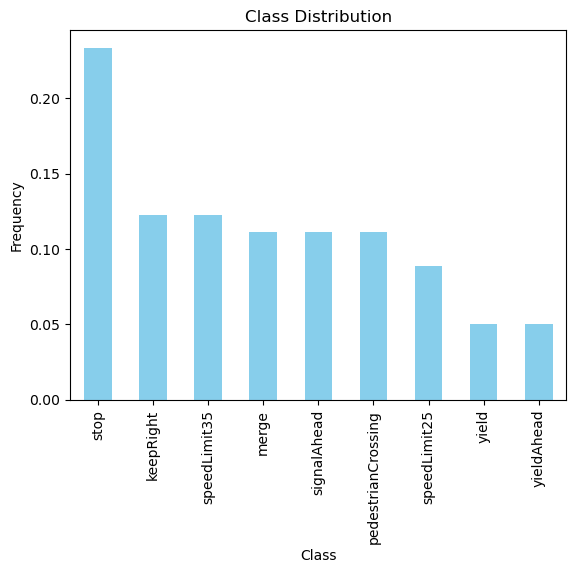

In [10]:
class_distribution = annotations_df['class'].value_counts(normalize=True)
class_distribution.plot(kind='bar', color='skyblue')

# Titles and labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Split the data into training, validation, and test sets
X_train, X_holdout, y_train, y_holdout = train_test_split(images, class_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=42)

In [12]:
# Save the split data
np.save('./data/preproc_data/X_train.npy', X_train)
np.save('./data/preproc_data/X_val.npy', X_val)
np.save('./data/preproc_data/X_test.npy', X_test)
np.save('./data/preproc_data/y_train.npy', y_train)
np.save('./data/preproc_data/y_val.npy', y_val)
np.save('./data/preproc_data/y_test.npy', y_test)

In [13]:
# Print the sizes of the datasets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 1890
Validation set size: 405
Testing set size: 405
